In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading data from .csv file
data = np.genfromtxt('spectroscopy data.csv', delimiter=',')

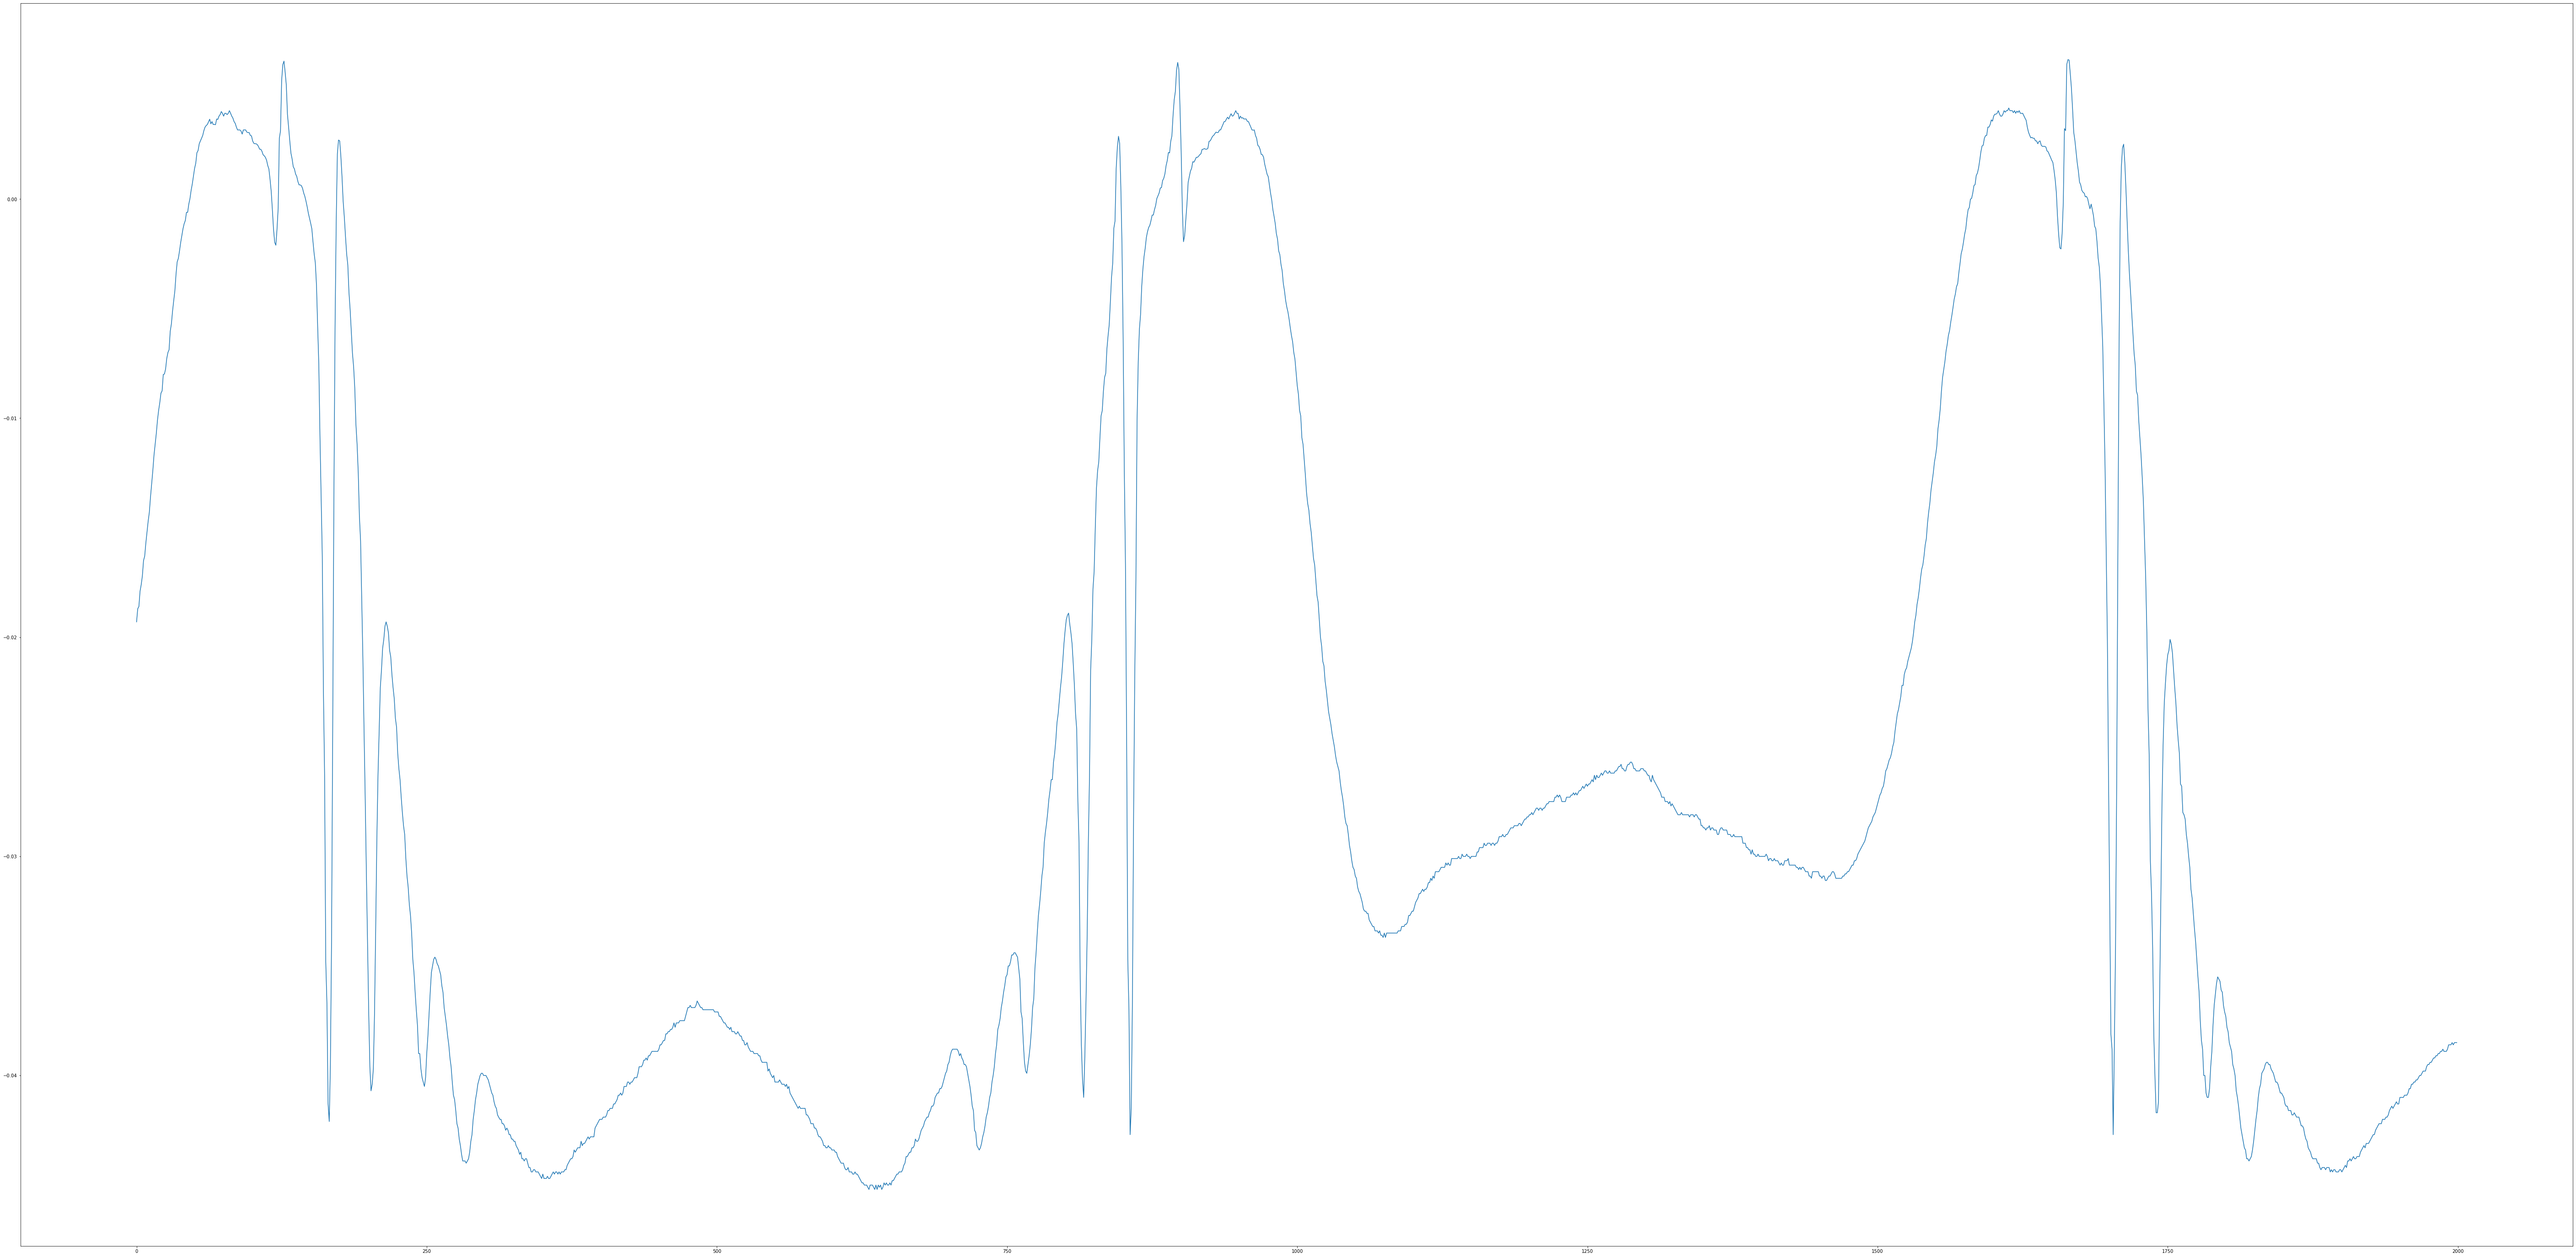

In [3]:
fig,ax = plt.subplots(1,1,figsize= (100,50))
plt.plot(data[:,4])
# plt.plot((data[:,2]-np.mean(data[:,2]))/1000)
plt.show()

In [4]:
error = data[np.argmin(data[:,2]):,4]

In [5]:
np.argmin(data[:,2])

482

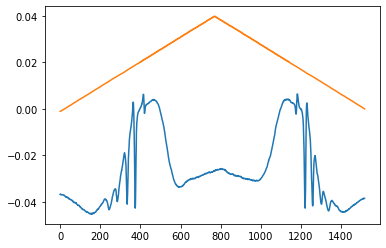

In [6]:
plt.plot(error)
plt.plot(data[np.argmin(data[:,2]):,2]/500)

In [6]:
min_val = 5
min_val_time = -1
max_val = -5
max_val_time = -1
threshold = 0.02 #in V

In [64]:
min_val = 5
min_val_time = -1
max_val = -5
max_val_time = -1
threshold = 0.02 #in V
max_v = []
min_v = []
crossing1 = []
crossing2 = []
signal_past10 = [0]*10
for i in range(0, len(error)//2):
    signal_diff = error[i]
    signal_past10.pop(0)
    signal_past10.append(signal_diff)
    if(signal_diff > max_val):
        max_val = signal_diff
        max_val_time = i
        max_v.append(max_val_time)
    if(signal_diff < min_val):
        min_val = signal_diff
        min_val_time = i
        min_v.append(i)
#         max_val = -5
    if(np.average(signal_past10) > min_val and (max_val - min_val) < threshold*1.2 and (max_val - min_val) > 0.8*threshold):
#         print(min_val)
        crossing1.append((min_val_time+max_val_time)//2)
        min_val = 5
        max_val = -5 
#     if(np.average(signal_past10) < max_val and (max_val - min_val) < threshold*1.2 and (max_val - min_val) > 0.8*threshold):
#         crossing2.append((min_val_time+max_val_time)//2)
#         min_val = 5
#         max_val = -5

In [65]:
len(crossing1)

10

In [66]:
crossing1

[225, 326, 337, 349, 367, 372, 376, 384, 468, 539]

In [67]:
crossing2

[]

In [68]:
max_val_time

756

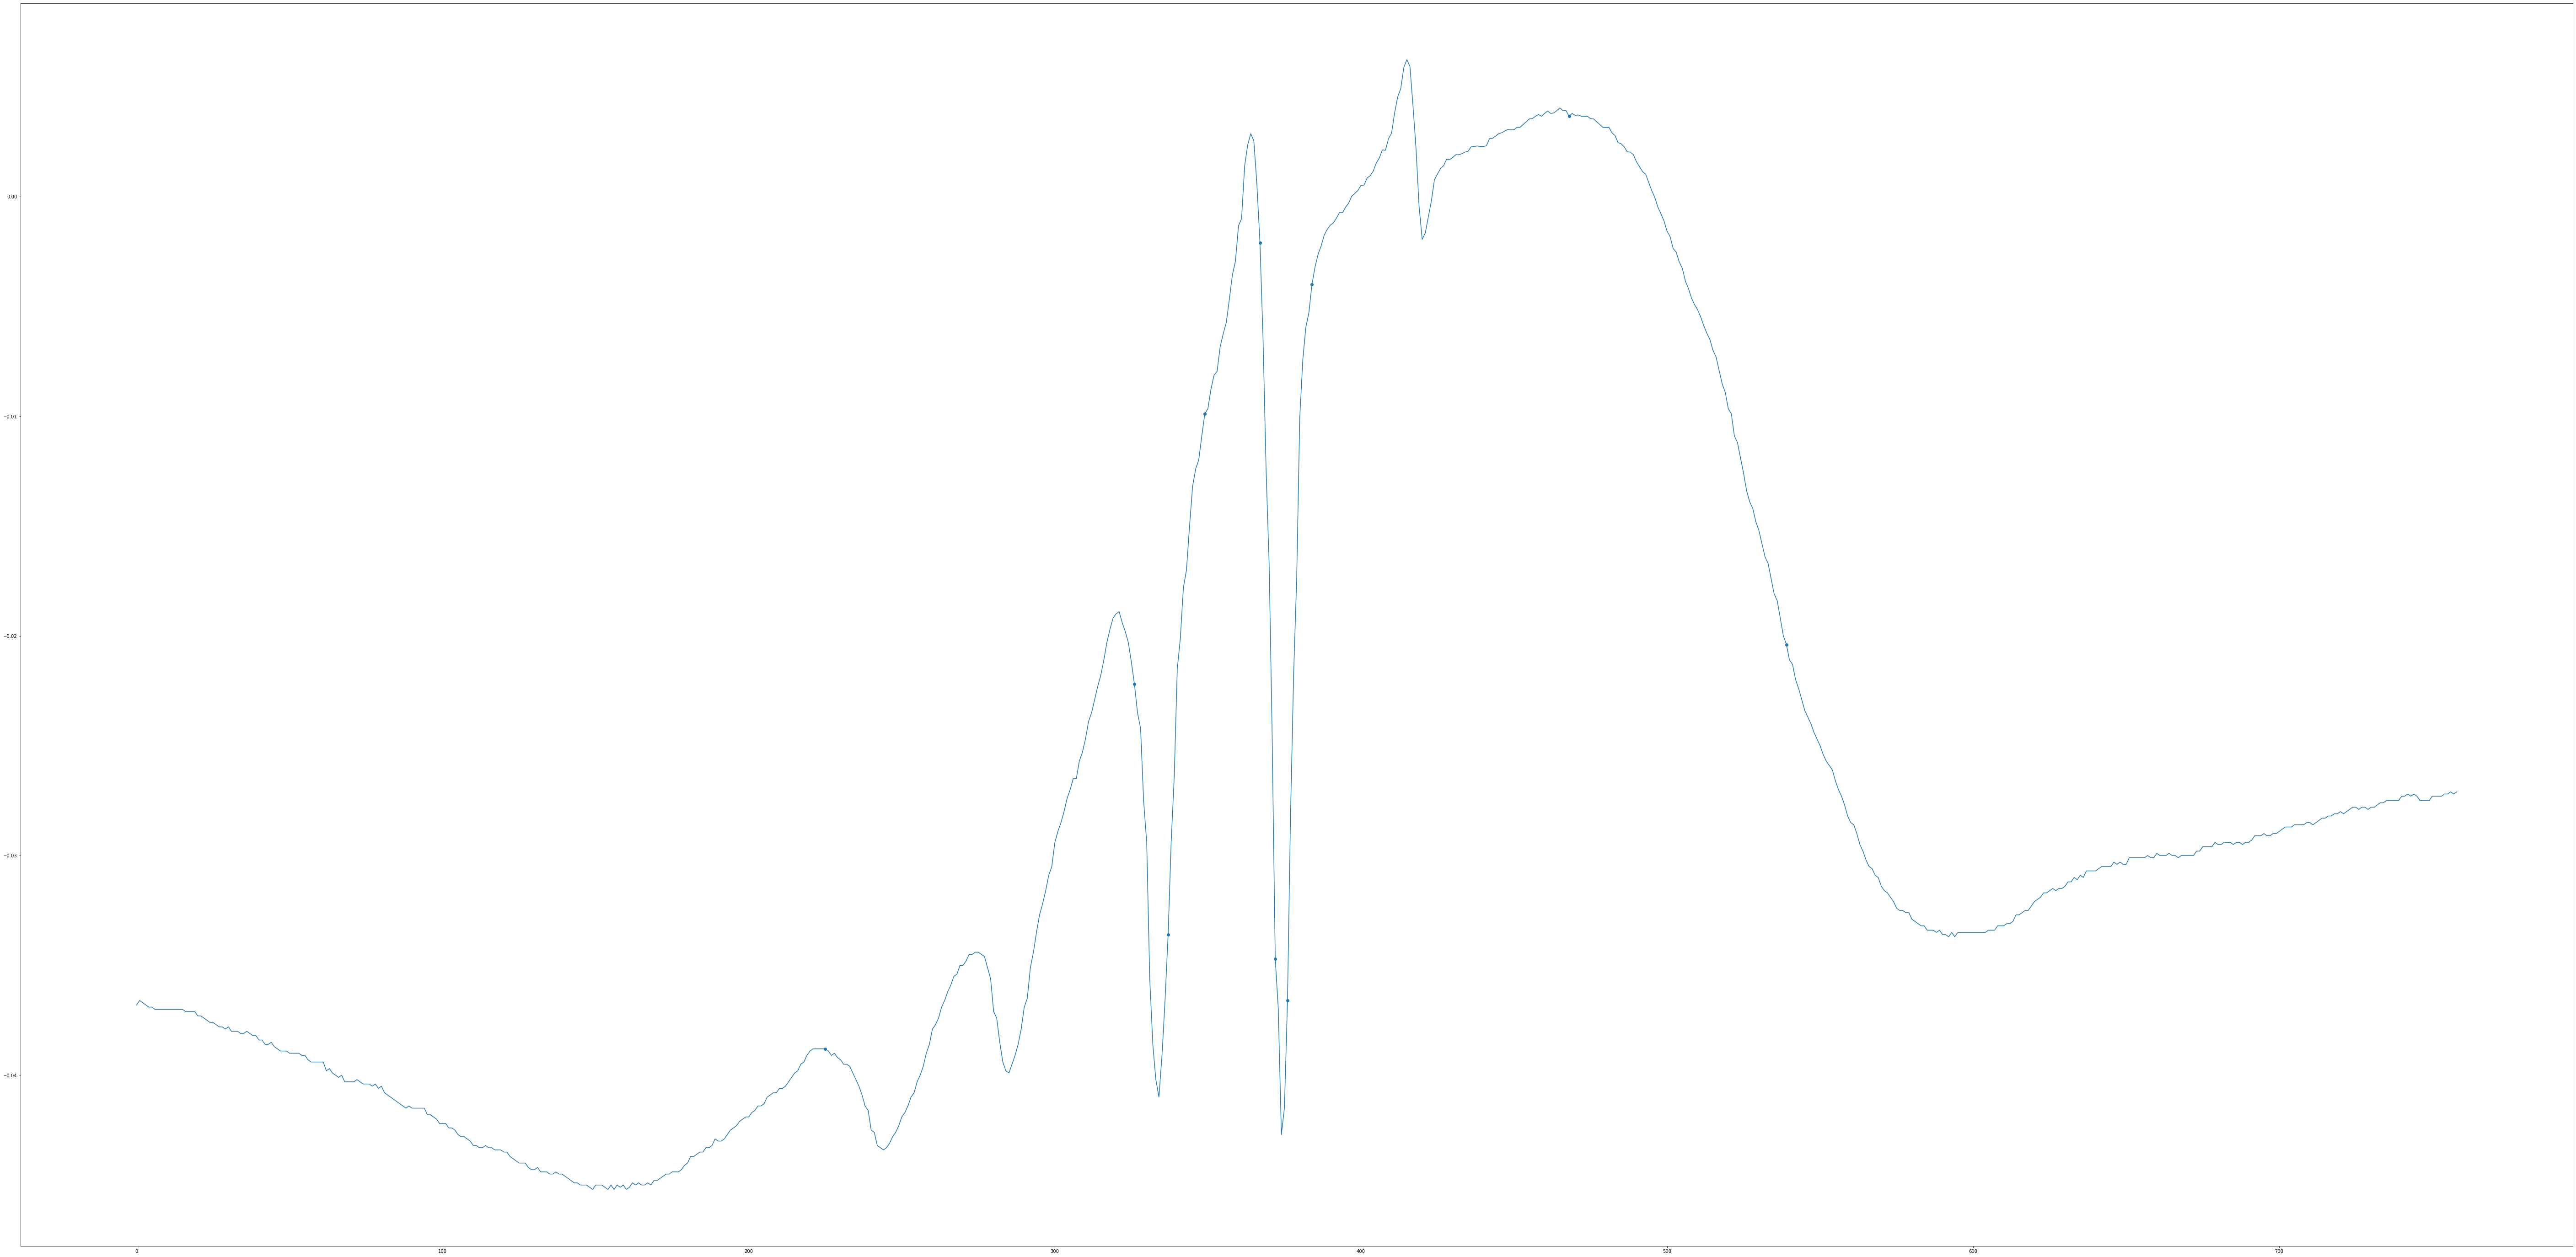

In [69]:
fig,ax = plt.subplots(1,1,figsize= (100,50))
plt.plot(error[0:len(error)//2])
plt.scatter(crossing1,[error[i] for i in crossing1])
plt.scatter(crossing2,[error[i] for i in crossing2])
# plt.plot((data[:,2]-np.mean(data[:,2]))/1000)
plt.show()

In [70]:
# fig,ax = plt.subplots(1,1,figsize= (10,50))
# plt.plot(error[200:300])
# # plt.plot(error)
# # plt.plot((data[:,2]-np.mean(data[:,2]))/1000)
# plt.show()

In [80]:
crossing = []
for i in range(0, len(error)//2):
    signal_diff = error[i]

    if(signal_diff < min_val):
        min_val = signal_diff
        min_val_time = i
        max_val = -5
    
    elif(signal_diff > max_val):
        max_val = signal_diff
        max_val_time = i
        if(abs(max_val-min_val-threshold)<0.25*threshold):
            crossing1.append((max_val_time+min_val_time)//2)

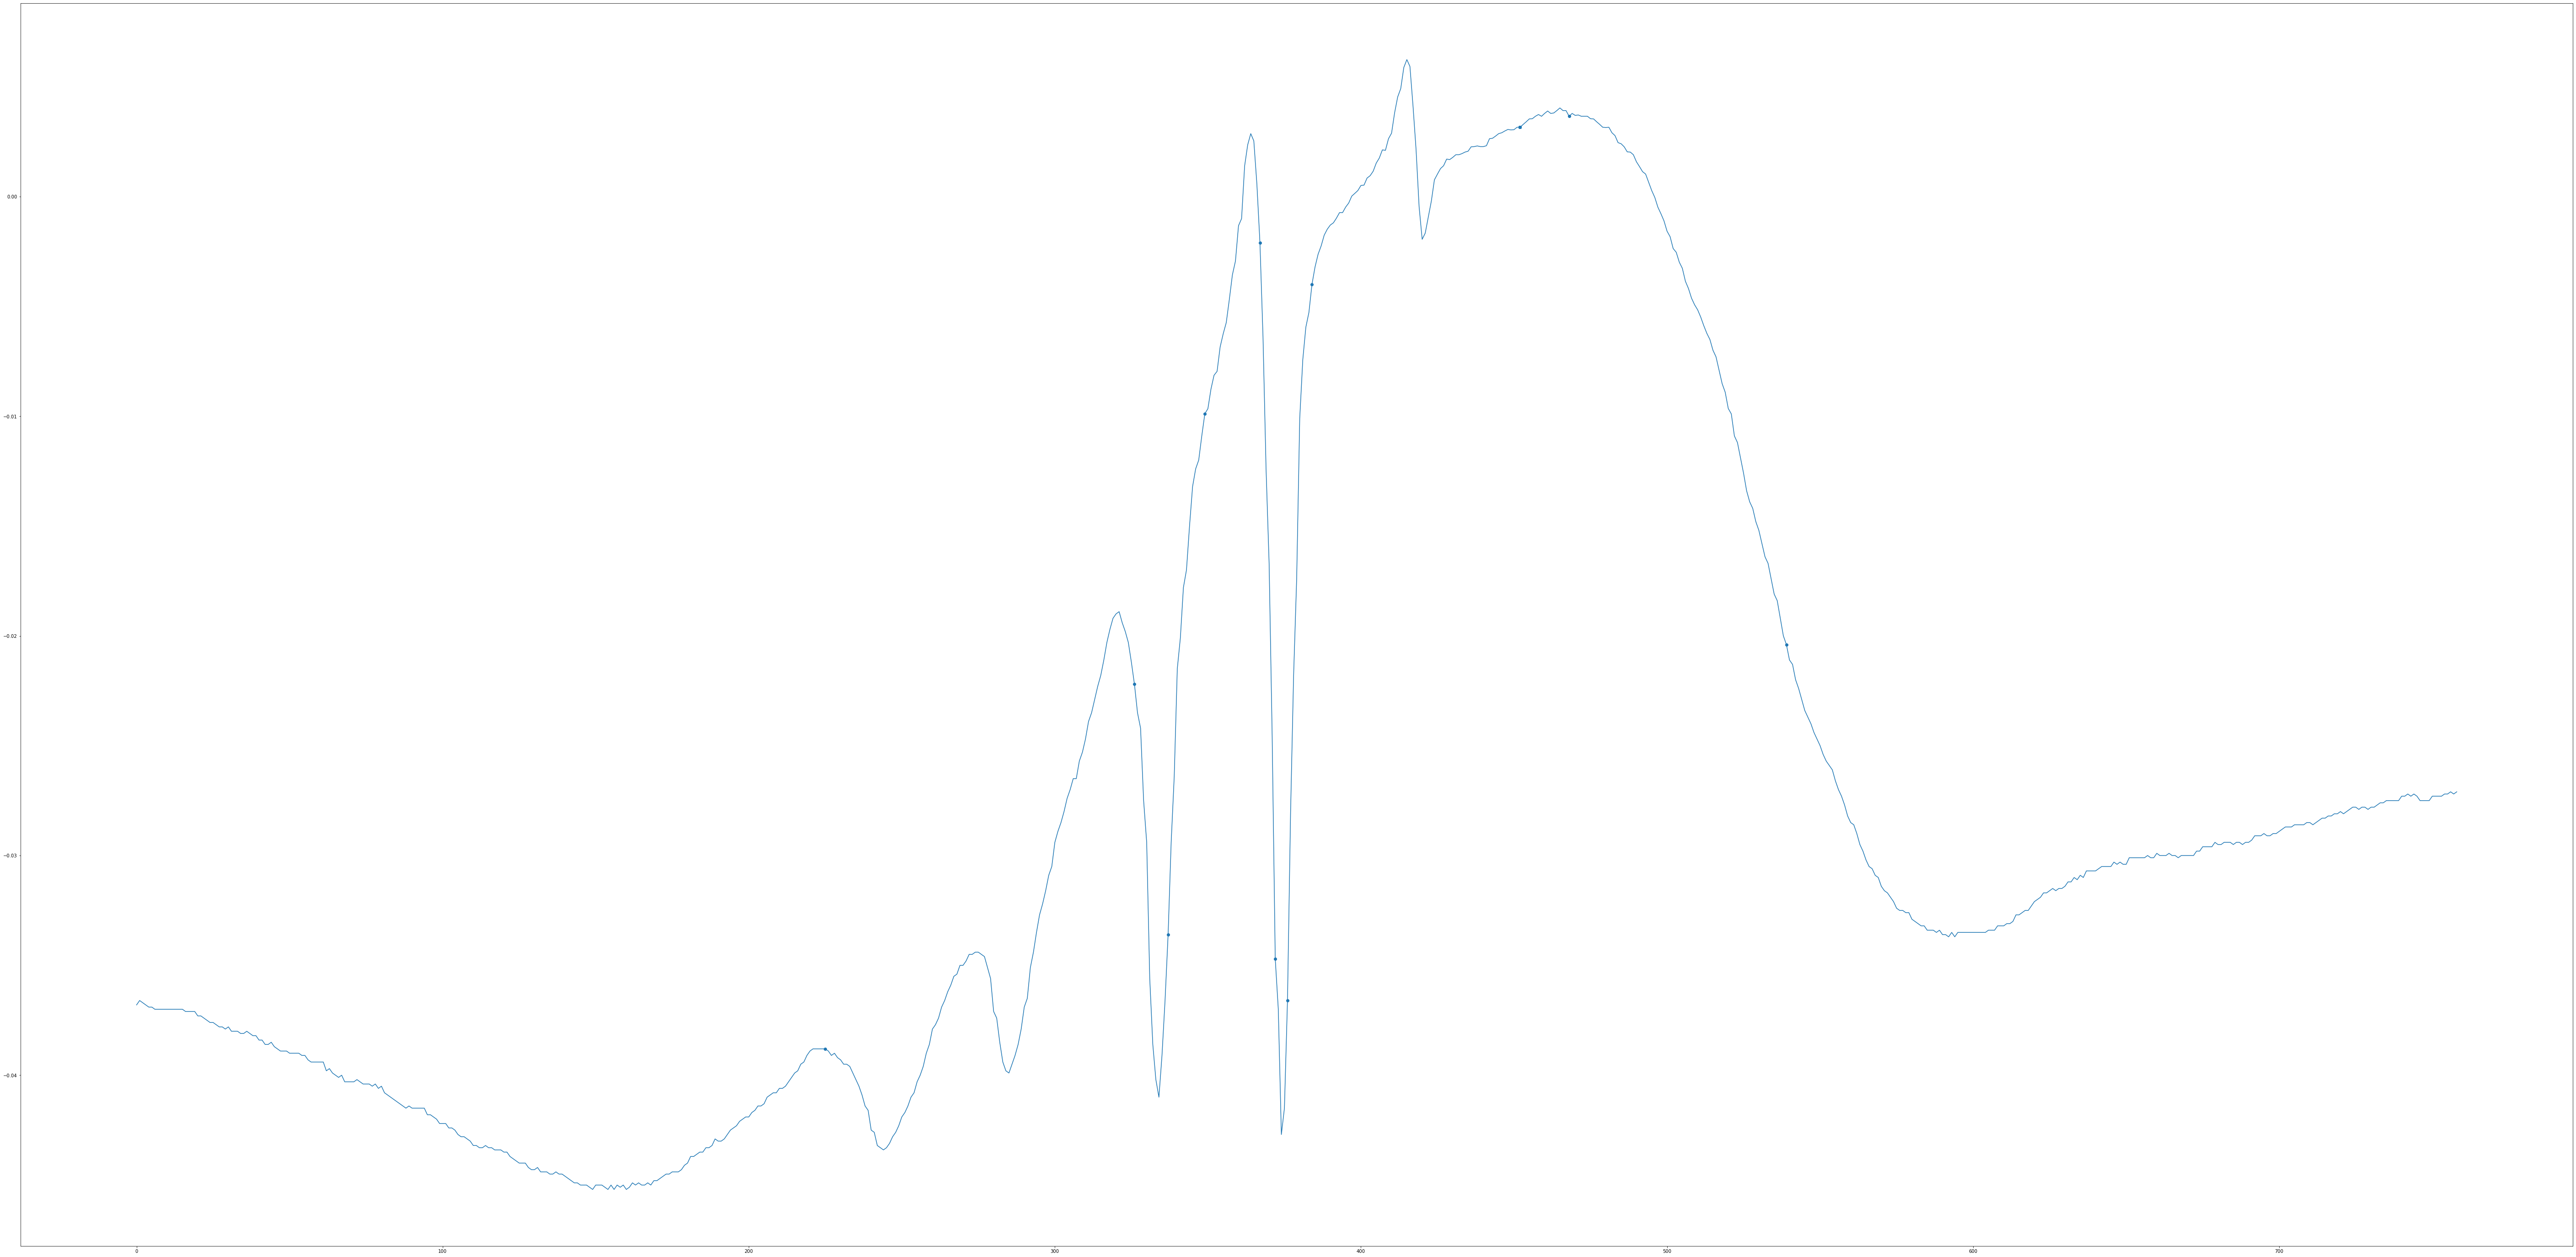

In [82]:
fig,ax = plt.subplots(1,1,figsize= (100,50))
plt.plot(error[0:len(error)//2])
plt.scatter(crossing1,[error[i] for i in crossing1])
plt.scatter(crossing2,[error[i] for i in crossing2])
# plt.plot((data[:,2]-np.mean(data[:,2]))/1000)
plt.show()

In [9]:
avg_error = []
avg_filter = [0]*10
for i in range(0, len(error)//2):
    avg_filter.pop(0)
    avg_filter.append(error[i])
    avg_error.append(np.average(avg_filter))

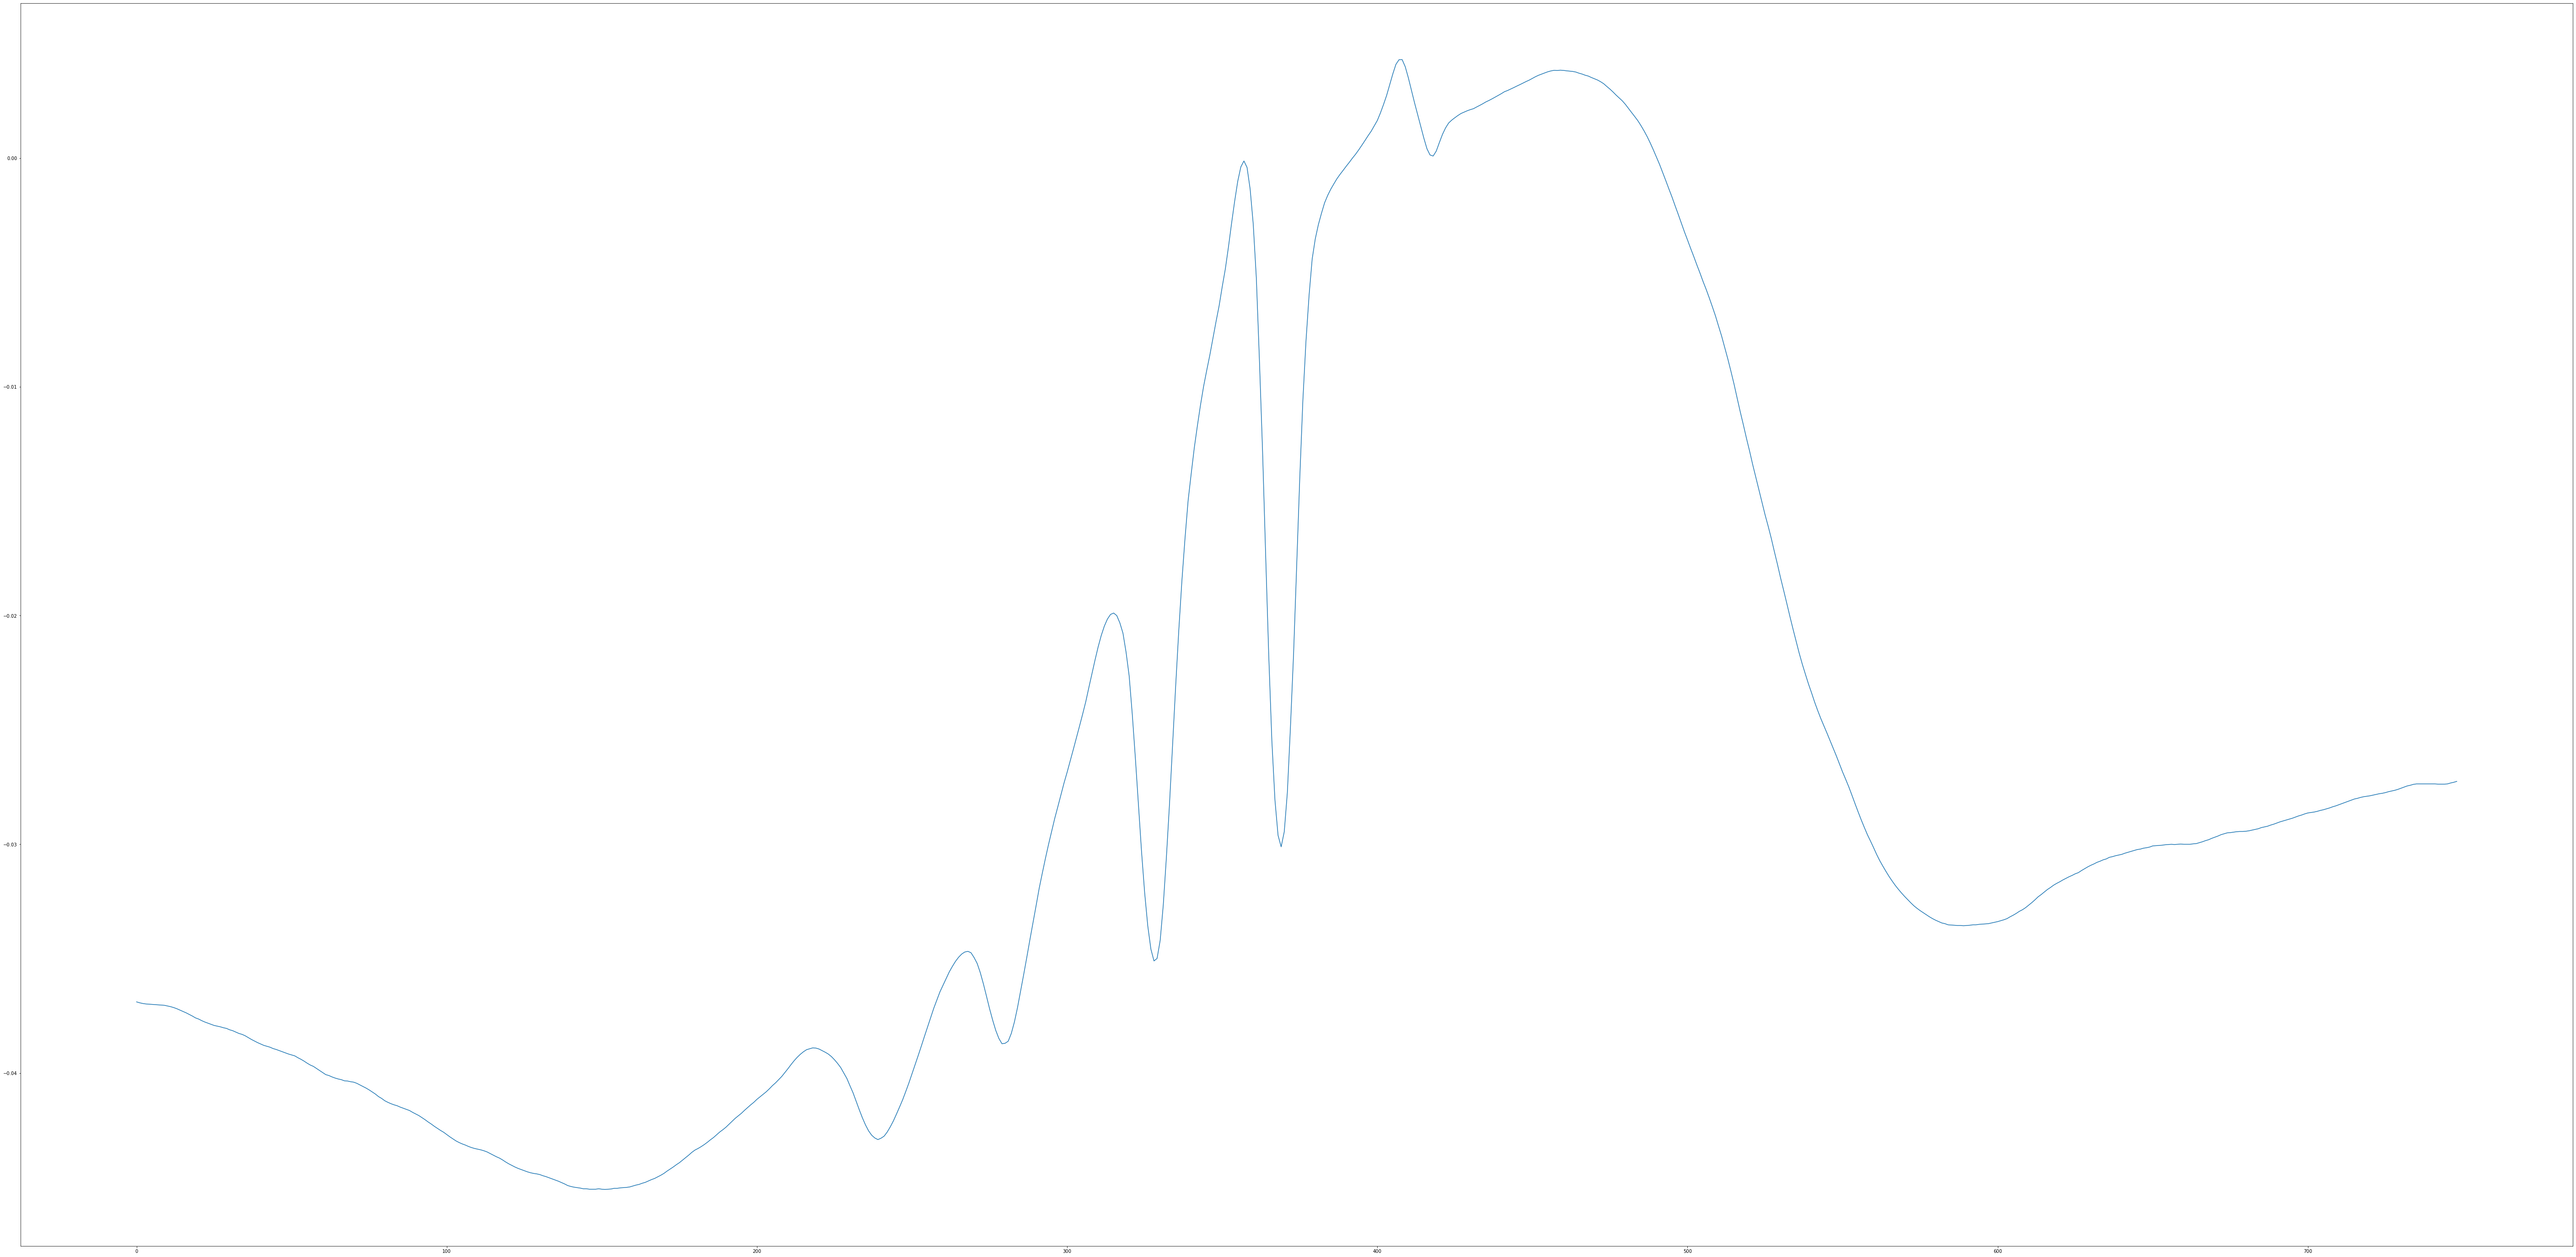

In [10]:
fig,ax = plt.subplots(1,1,figsize= (100,50))
plt.plot(avg_error[10:])
plt.show()

In [11]:
# do {
#     current_time = micros(); //time in mircoseconds
#     ramp_time = current_time-ramp_reset_time;
#     analog.write(ToBits(RampOut(ramp_time)),ToBits(0),true);
#     float sig_read = ToVoltage(analog.read(PD_channel));

#     /* Find the minimum */
#     if(sig_read<min_val && ramp_time<period/2) {
#       min_val = sig_read;
#       min_val_time = ramp_time; 
#       max_val = -5;
#     }
#     /* Find the maximum that follows the minimum - if the difference between the two is close to the 
#        signal amplitude, the correct peak has been found */
#     if(ramp_time>min_val_time && sig_read>max_val && ramp_time<period/2) {
#       max_val = sig_read;
#       max_val_time = ramp_time;
#       slope = max_val - min_val;
#       if(abs(slope-sig_amp)<0.25*sig_amp) {
#         lock_point = (max_val+min_val)/2.0;
#         lock_point_time = (max_val_time + min_val_time)/2.0;
#         lock_point_offset = RampOut(lock_point_time);
#         lock_point_found = 1;
#         lock_point_slope = slope;
#       }
#     }      
  
#   } while(ramp_time<period);

In [38]:
sig_amp = 0.06
min_val = 5
max_val = -5
crossing = []
for i in range(10, len(avg_error)):
    signal_diff = avg_error[i]
#     print(2)
    if(signal_diff < min_val):
        min_val = signal_diff
        min_val_time = i
        max_val = -500
#         print(signal_diff > max_val)
    if(i > min_val_time and signal_diff > max_val):
        max_val = signal_diff
        max_val_time = i
        slope = max_val-min_val
#         print(abs(max_val-min_val-threshold)<0.5*threshold)
        if(abs(slope-sig_amp)<0.25*sig_amp):
            crossing.append((max_val_time,min_val_time))

In [39]:
crossing

[(402, 161),
 (403, 161),
 (404, 161),
 (405, 161),
 (406, 161),
 (407, 161),
 (408, 161),
 (409, 161),
 (410, 161),
 (411, 161),
 (412, 161),
 (413, 161),
 (414, 161),
 (415, 161),
 (416, 161),
 (417, 161),
 (418, 161)]

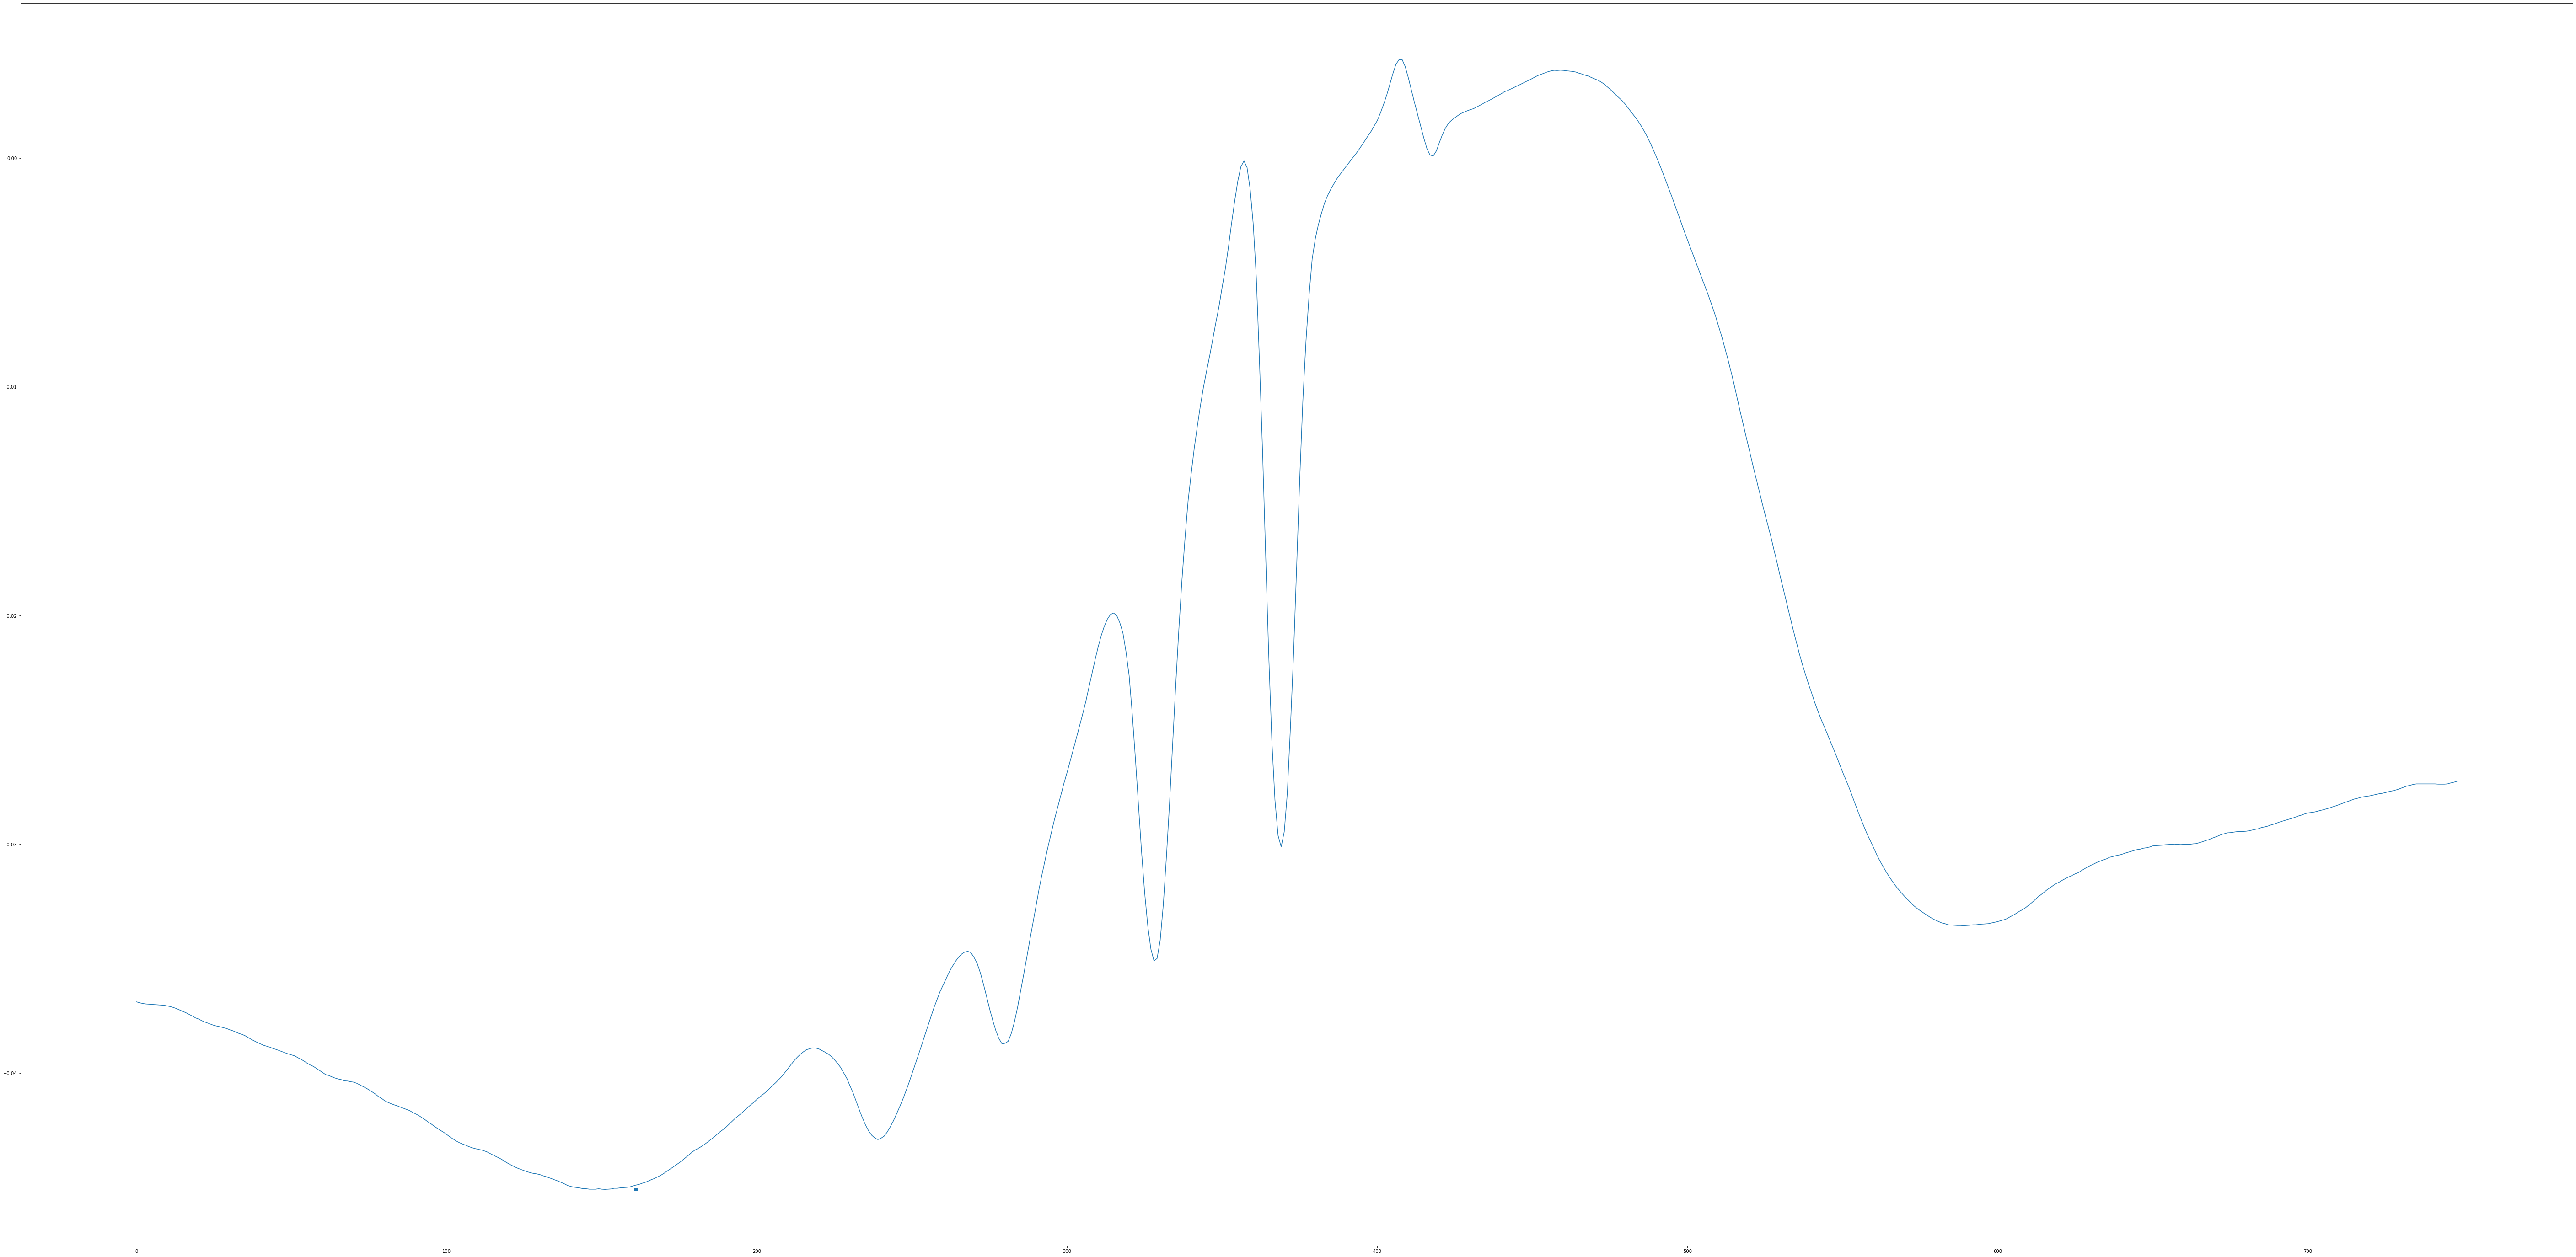

In [44]:
fig,ax = plt.subplots(1,1,figsize= (100,50))
plt.plot(avg_error[10:])
# plt.scatter([i[0] for i in crossing], [avg_error[i[0]] for i in crossing])
plt.scatter([i[1] for i in crossing], [avg_error[i[1]] for i in crossing])
# plt.scatter(crossing,[avg_error[i] for i in crossing])
# plt.plot((data[:,2]-np.mean(data[:,2]))/1000)
plt.show()

In [58]:
def sign(x):
    if(x>=0):
        return 1
    else:
        return -1

In [10]:
avg_error = []
avg_filter = [0]*10

deri = []
deri_filter = [0]*20

d_curr = 1  # -1 -> -ve and +1 -> +ve
d_prev = 1

max_val_index = 0
max_val = 5
min_val_index = 0
min_val = 5
min_index = []
max_index = []
change = False
for i in range(0, len(error)//2):
    avg_filter.pop(0)
    avg_filter.append(error[i])
    avg_error.append(np.average(avg_filter))
    if(i>0):
        deri_filter.pop(0)
        deri_filter.append(avg_error[-1] - avg_error[-2])
        deri.append(np.average(deri_filter))
    if(i>1):
#         sign_of_d_prev = sign(deriviative[-1])
#         sign_of_d_curr = sign(deriviative[-1])
#         j = 0
#         temp_sign = sign(deriviative[-1])
#         if(j<5 and sign(deriviative[-1]) == temp_sign):
#             j+=1
#         elif(sign(deriviative[-1]) != temp_sign):
#             j=0
#         else:
#             j=0
#             sign_of_d_prev = sign_of_d_curr
#             sign_of_d_curr = temp_sign
#         j = 0
#         temp = deri[-2]
#         if(j<5 and temp*deri[-1]<0):
#             j+=1
#         elif(temp*deri[-1]>0):
#             j=0
#         elif(j==4):
#             j=0
#             change = True
            
    
    if(avg_error[i] > max_val):
        max_val_index = i
        max_val = avg_error[i]
    if(avg_error[i] < min_val):
        min_val_index = i
        min_val = avg_error[i]
    if(i>1):
        if(min_val < avg_error[i] and deri[-2]*deri[-1]<0):
            min_index.append(min_val_index)
            min_val = 5
        if(max_val > avg_error[i] and deri[-2]*deri[-1]<0):
            max_index.append(max_val_index)
            max_val = -5
        

In [11]:
min_index, max_index

([161, 171, 249, 261, 289, 299, 338, 348, 379, 392, 428, 444, 599],
 [0, 228, 278, 325, 367, 418, 469, 481])

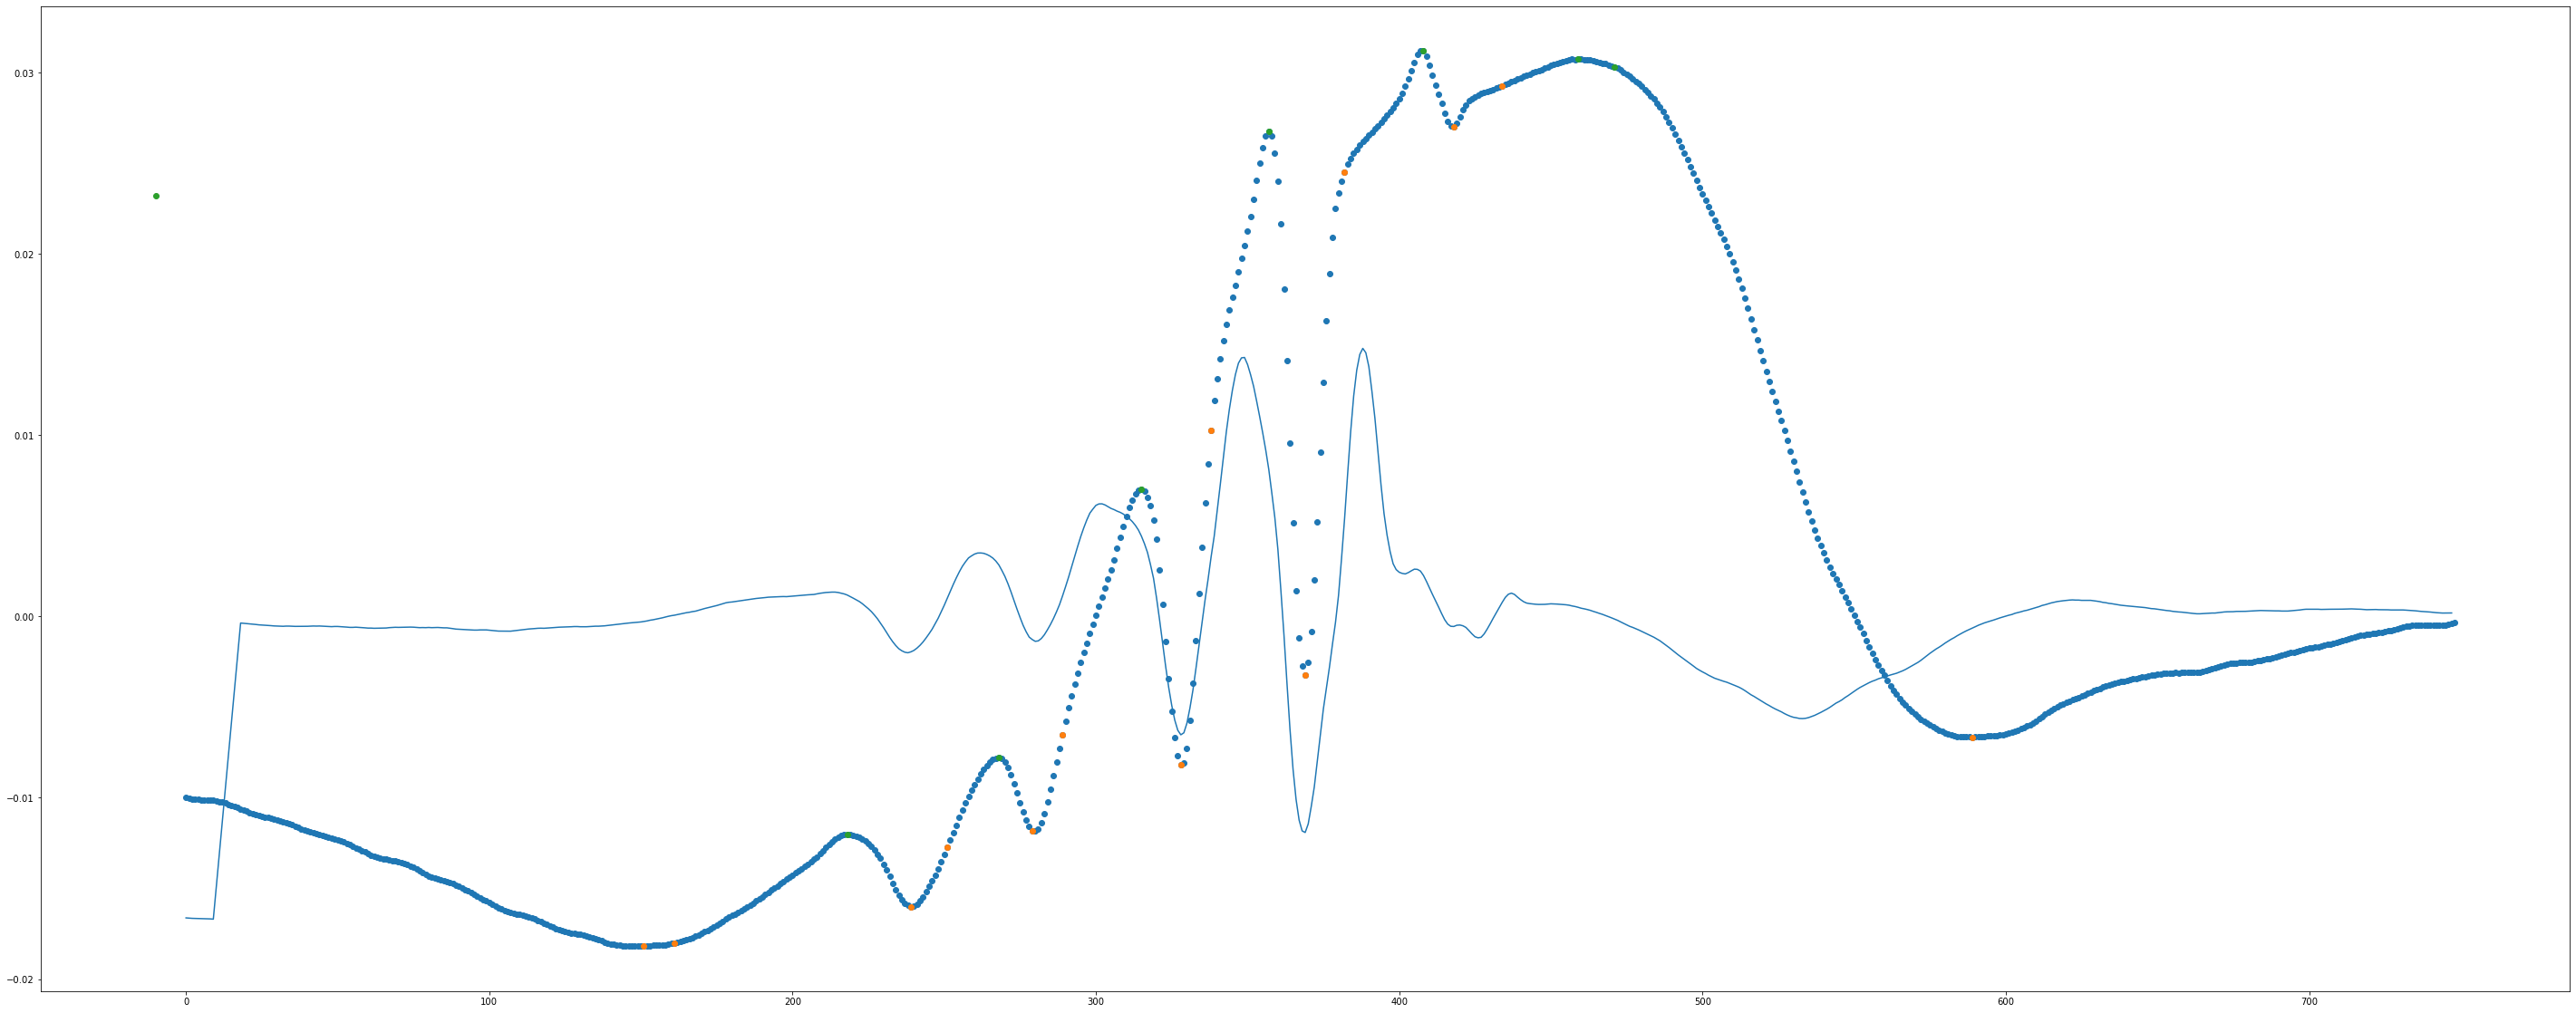

In [12]:
fig,ax = plt.subplots(1,1,figsize= (50,20))
# plt.plot(np.asarray(avg_error[10:]) - np.mean(avg_error[10:]))
plt.scatter([i for i in range(0,len(avg_error[10:]))],np.asarray(avg_error[10:]) - np.mean(avg_error[10:]))
plt.scatter([i-10 for i in min_index], [avg_error[i]- np.mean(avg_error[10:]) for i in min_index])
plt.scatter([i-10 for i in max_index], [avg_error[i]- np.mean(avg_error[10:]) for i in max_index])
plt.plot(np.asarray(deri[10:])*10)
plt.show()

In [9]:
deriviative

-3.999999999999837e-05

In [24]:
(data[0,0]-data[2,0])/2

-0.0005000000000000004

In [7]:
def ramp_out(ramp_time):
    amp = 4095;
    if(ramp_time<=period):
        ramp = (amp/(period))*ramp_time
    else:
        ramp = 2*amp-(amp/(period))*ramp_time
    return ramp

In [8]:
ramp_time = 0
ramp_end_time = 8190
period = 4095
temp = []
while(ramp_time<=ramp_end_time):
    temp.append(ramp_out(ramp_time))
    ramp_time+=1

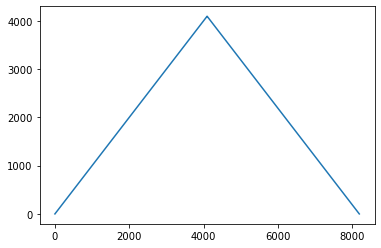

In [9]:
plt.plot(temp)